In [ ]:
import numpy as np
import pandas as pd #loading and inspect data ( Dataframe/Data manipulation)
import matplotlib.pyplot as plt # Visualize the data
import seaborn as sns# Visualize the data
from sklearn.model_selection import train_test_split #splitting the dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder # Normalization /Standarzination
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import joblib
from flask import Flask, request, jsonify




In [ ]:
#Etape1:Understanding the dataset
df=pd.read_csv('heart.csv')
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Etape2:Data preprocessing
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:")
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldp

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print("\nClass Distribution:")
print(df['HeartDisease'].value_counts())



Class Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


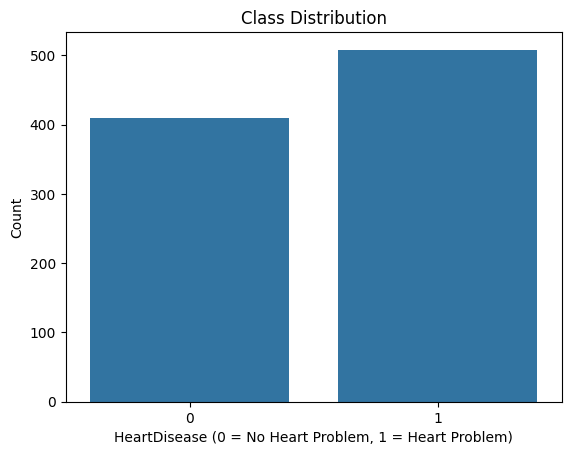

In [ ]:
#Visualize the class distribution
sns.countplot(x='HeartDisease', data=df)
plt.title('Class Distribution')
plt.xlabel('HeartDisease (0 = No Heart Problem, 1 = Heart Problem)')
plt.ylabel('Count')
plt.show()

In [ ]:
#checking for categorical cols (y/n)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)
#We have categorical data so we need encodage

if len(categorical_cols) > 0:
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
    print("Categorical columns encoded.")



Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Categorical columns encoded.


In [ ]:
#Normalizing numerical features
numerical_cols = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']].columns
print("\nNumerical Columns:", numerical_cols)


Numerical Columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [ ]:
#standardization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical columns scaled.")


Numerical columns scaled.


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078,1
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078,1
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078,1
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078,1


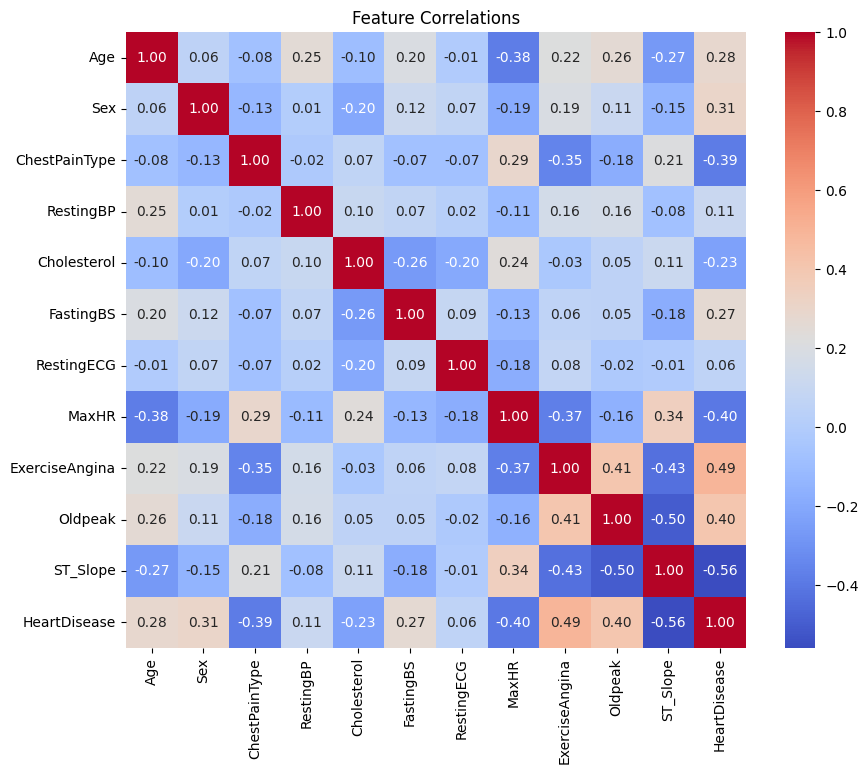

In [ ]:
# Etape3: Feature engineering (correlation heatmap )
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (734, 11)
Testing Features Shape: (184, 11)
Training Labels Shape: (734,)
Testing Labels Shape: (184,)


In [ ]:
#Etape5:Model Training

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.875


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[70 12]
 [11 91]]


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

ROC-AUC Score: 0.9227642276422765


In [ ]:
# Ensure param_grid and model are defined
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=3, n_jobs=-1)

# Fit the model
try:
    grid_search.fit(X_train, y_train)
    print("GridSearchCV fitting completed.")
    print("Best Parameters:", grid_search.best_params_)
except Exception as e:
    print("Error during GridSearchCV fitting:", e)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fitting completed.
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("\nConfusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))

Best Cross-Validation Accuracy: 0.8664430155623893

Confusion Matrix (Tuned):
 [[72 10]
 [ 8 94]]

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
#Logistic Regression algorithme
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))



Confusion Matrix (Logistic Regression):
 [[65 17]
 [ 7 95]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



In [ ]:
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print("\nROC-AUC Score (Logistic Regression):", roc_auc_log_reg)


ROC-AUC Score (Logistic Regression): 0.8971783835485413


In [ ]:
# Analyze Feature Importance (Random forest)
# Extract feature importance
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


           Feature  Importance
10        ST_Slope    0.252837
4      Cholesterol    0.115252
7            MaxHR    0.113833
9          Oldpeak    0.110641
2    ChestPainType    0.105808
8   ExerciseAngina    0.080912
0              Age    0.076545
3        RestingBP    0.067069
1              Sex    0.031110
6       RestingECG    0.024690
5        FastingBS    0.021302


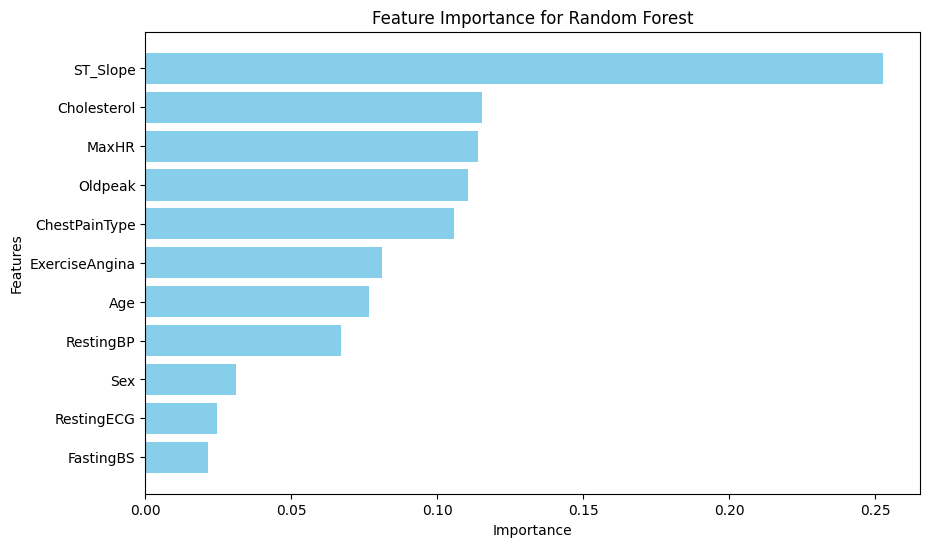

In [ ]:
# visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
#refining my model
top_features = ['ST_Slope', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ChestPainType', 'ExerciseAngina']
X_train_refined = X_train[top_features]
X_test_refined = X_test[top_features]

In [ ]:
rf_model_refined = RandomForestClassifier(random_state=42)
rf_model_refined.fit(X_train_refined, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_refined = rf_model_refined.predict(X_test_refined)
y_pred_proba_refined = rf_model_refined.predict_proba(X_test_refined)[:, 1]
print("Confusion Matrix (Refined):\n", confusion_matrix(y_test, y_pred_refined))
print("\nClassification Report (Refined):\n", classification_report(y_test, y_pred_refined))
roc_auc_refined = roc_auc_score(y_test, y_pred_proba_refined)
print("\nROC-AUC Score (Refined):", roc_auc_refined)

Confusion Matrix (Refined):
 [[65 17]
 [14 88]]

Classification Report (Refined):
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.84      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


ROC-AUC Score (Refined): 0.890363462458154


In [ ]:
#more features
top_features_extended = ['ST_Slope', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ChestPainType',
                         'ExerciseAngina', 'Age', 'RestingBP']

X_train_extended = X_train[top_features_extended]
X_test_extended = X_test[top_features_extended]

rf_model_extended = RandomForestClassifier(random_state=42)
rf_model_extended.fit(X_train_extended, y_train)

y_pred_extended = rf_model_extended.predict(X_test_extended)
y_pred_proba_extended = rf_model_extended.predict_proba(X_test_extended)[:, 1]

print("Confusion Matrix (Extended):\n", confusion_matrix(y_test, y_pred_extended))
print("\nClassification Report (Extended):\n", classification_report(y_test, y_pred_extended))
roc_auc_extended = roc_auc_score(y_test, y_pred_proba_extended)
print("\nROC-AUC Score (Extended):", roc_auc_extended)


Confusion Matrix (Extended):
 [[67 15]
 [13 89]]

Classification Report (Extended):
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184


ROC-AUC Score (Extended): 0.9190578670492586


In [ ]:
#big flop
from sklearn.feature_selection import RFE


rf_model_rfe = RandomForestClassifier(random_state=42)
selector = RFE(rf_model_rfe, n_features_to_select=5)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Selected Features using RFE:", selected_features)
rf_model_rfe.fit(X_train[selected_features], y_train)
y_pred_rfe = rf_model_rfe.predict(X_test[selected_features])
y_pred_proba_rfe = rf_model_rfe.predict_proba(X_test[selected_features])[:, 1]

print("\nConfusion Matrix (RFE):\n", confusion_matrix(y_test, y_pred_rfe))
print("\nClassification Report (RFE):\n", classification_report(y_test, y_pred_rfe))
roc_auc_rfe = roc_auc_score(y_test, y_pred_proba_rfe)
print("\nROC-AUC Score (RFE):", roc_auc_rfe)


Selected Features using RFE: Index(['ChestPainType', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope'], dtype='object')

Confusion Matrix (RFE):
 [[65 17]
 [18 84]]

Classification Report (RFE):
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        82
           1       0.83      0.82      0.83       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184


ROC-AUC Score (RFE): 0.8724892395982783


In [ ]:
#RandomizedSearchCV (Hyperparameter Tuning)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
y_pred_random = random_search.predict(X_test)
y_pred_proba_random = random_search.predict_proba(X_test)[:, 1]
print("\nConfusion Matrix (RandomizedSearchCV):\n", confusion_matrix(y_test, y_pred_random))
print("\nClassification Report (RandomizedSearchCV):\n", classification_report(y_test, y_pred_random))
roc_auc_random = roc_auc_score(y_test, y_pred_proba_random)
print("\nROC-AUC Score (RandomizedSearchCV):", roc_auc_random)


Confusion Matrix (RandomizedSearchCV):
 [[68 14]
 [ 8 94]]

Classification Report (RandomizedSearchCV):
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


ROC-AUC Score (RandomizedSearchCV): 0.9283835485413678


In [ ]:
!pip install xgboost


In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[69  8]
 [16 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


ROC-AUC Score: 0.8732855929117611


In [ ]:
log_reg = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('LogReg', log_reg),
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'
)

In [ ]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[68  9]
 [12 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184


ROC-AUC Score: 0.8854836752033014
